In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

import anndata2ri
import rpy2
from rpy2.robjects import r


anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
%%R
# set.seed() ? Milo results vary per run - saved t_milo from a previous run instead

NULL


In [3]:
%%R
suppressPackageStartupMessages(library(miloR))
suppressPackageStartupMessages(library(scrabbitr))
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(ggrastr))
suppressPackageStartupMessages(library(ggridges))
suppressPackageStartupMessages(library(ggalluvial))
suppressPackageStartupMessages(library(ggrepel))

Possible Ensembl SSL connectivity problems detected.
Please see the 'Connection Troubleshooting' section of the biomaRt vignette
vignette('accessing_ensembl', package = 'biomaRt')Error in curl::curl_fetch_memory(url, handle = handle) : 
  SSL peer certificate or SSH remote key was not OK: [uswest.ensembl.org] SSL certificate problem: certificate has expired



In [4]:
%%R
out_ips <- readRDS('compare_nhoods/intestine_analysis/IPS_scrabbitr_out.rds')
out_tips <- readRDS('compare_nhoods/intestine_analysis/tIPS_scrabbitr_out.rds')
out_fsc <- readRDS('compare_nhoods/intestine_analysis/FSC_scrabbitr_out.rds')
out_asc <- readRDS('compare_nhoods/intestine_analysis/ASC_scrabbitr_out.rds')
t_milo <- readRDS('compare_nhoods/intestine_analysis/t_milo.rds')

In [5]:
%%R
t_maxNhoods_ips <- getMaxMappings(out_ips$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_tips <- getMaxMappings(out_tips$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_fsc <- getMaxMappings(out_fsc$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_asc <- getMaxMappings(out_asc$nhood_sim, 1, long_format=FALSE) 

In [6]:
%%R
t_milo

class: Milo 
dim: 3000 15773 
metadata(2): hvg log1p
assays(3): X counts logcounts
rownames(3000): A1BG A4GALT ... ZXDC ZZEF1
rowData names(18): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(15773): S1_AAACCTGGTCTCATCC_fetal-0
  S1_AAACCTGGTGCCTGGT_fetal-0 ... TTTGTTGAGCTCGACC-1-2-1
  TTTGTTGCATGCCGGT-1-2-1
colData names(16): sample_id Age ... n_genes tissue
reducedDimNames(1): UMAP
altExpNames(0):
nhoods dimensions(2): 15773 753
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 753
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 753 753


In [7]:
%%R

head(colData(t_milo))

DataFrame with 6 rows and 16 columns
                                               sample_id      Age  Cell_type
                                                <factor> <factor>   <factor>
S1_AAACCTGGTCTCATCC_fetal-0 Sample_HT-01_d122_Duodenum_1     d122 Enterocyte
S1_AAACCTGGTGCCTGGT_fetal-0 Sample_HT-01_d122_Duodenum_1     d122 Enterocyte
S1_AAACCTGGTGTAAGTA_fetal-0 Sample_HT-01_d122_Duodenum_1     d122 Enterocyte
S1_AAACGGGCAGGAATGC_fetal-0 Sample_HT-01_d122_Duodenum_1     d122 Stem_cell 
S1_AAACGGGGTTCCCGAG_fetal-0 Sample_HT-01_d122_Duodenum_1     d122 Enterocyte
S1_AAAGCAATCGACGGAA_fetal-0 Sample_HT-01_d122_Duodenum_1     d122 Enterocyte
                               batch n_genes_by_counts total_counts
                            <factor>         <integer>    <numeric>
S1_AAACCTGGTCTCATCC_fetal-0        0              5196        24714
S1_AAACCTGGTGCCTGGT_fetal-0        0              3258        10617
S1_AAACCTGGTGTAAGTA_fetal-0        0              4395        17637
S1_AAAC

In [8]:
%%R
t_maxNhoods_ips

     nhoods1 nhoods2       sim
  1:    3411   52614 0.8037613
  2:   14564   52614 0.6364819
  3:    4656  110472 0.7545341
  4:      69  118961 0.7668471
  5:   12689   52614 0.6871815
 ---                          
749:     830   52614 0.7634858
750:    3345   52614 0.7883224
751:    5358   52763 0.5237575
752:    9476   52614 0.5278574
753:   12848   52614 0.6995420


In [9]:
%%R
t_maxNhoods_fsc

     nhoods1 nhoods2       sim
  1:    3411   15824 0.7317778
  2:   14564   72472 0.7706300
  3:    4656   50949 0.7653739
  4:      69   32890 0.7342402
  5:   12689   72472 0.8222466
 ---                          
749:     830   57228 0.7988659
750:    3345   15824 0.7294508
751:    5358   56551 0.8537057
752:    9476   68838 0.7032180
753:   12848   51821 0.8372255


In [10]:
%%R
t_maxNhoods_asc

     nhoods1 nhoods2       sim
  1:    3411   62604 0.6089920
  2:   14564   62604 0.8117273
  3:    4656   16146 0.5485447
  4:      69    5905 0.7303410
  5:   12689   62604 0.8325157
 ---                          
749:     830   64594 0.6755620
750:    3345   62604 0.6097112
751:    5358   18552 0.8892080
752:    9476   62391 0.7506413
753:   12848   62604 0.8344075


#### iPSC vs ACS

In [11]:
%%R
t_maxNhoods_ips <- getMaxMappings(out_ips$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_fsc <- getMaxMappings(out_fsc$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_asc <- getMaxMappings(out_asc$nhood_sim, 1, long_format=FALSE) 

In [12]:
%%R
# t_maxNhoods_ips$sim = t_maxNhoods_ips$sim/t_maxNhoods_fsc$sim
t_maxNhoods_ips$sim = t_maxNhoods_ips$sim-t_maxNhoods_asc$sim

In [13]:
%%R

myPalette <- colorRampPalette(rev(brewer.pal(11, "RdBu")))

In [14]:
%%R


# plot nhood in primary data
p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods_ips)
p1 <- p1 + scale_colour_gradientn(colours = myPalette(5), name="Max correlation difference") + # limits = c(-1.8,4)
            labs(title = 'Max correlation difference\nPSC vs ASC')

# p1 <- p1 + scale_color_gradient2(midpoint = 1, name="Max correlation ratio\nPSC vs FSC" )
# viridis::scale_color_viridis(option="cividis",name="Max correlation ratio\nPSC vs FSC")
ggsave("compare_nhoods/intestine_analysis/contrast_tissue_nhood_max_corr_psc_vs_asc.pdf", p1, width=10, height=8, dpi=300)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


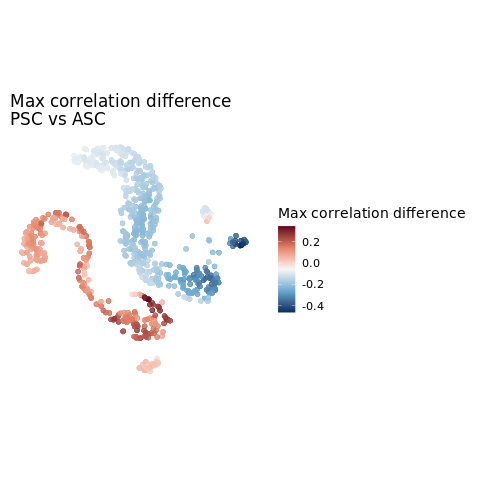

In [15]:
%%R
p1

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
           x         y  name size max_correlation .ggraph.orig_index
1 -0.4155365 12.493423  3411   40      0.19476932                  1
2  8.2848873 17.295000 14564   35     -0.17524536                  2
3  9.4872780 -3.500453  4656   34      0.20598944                  3
4  9.8444338 -7.547250    69   33      0.03650616                  4
5  9.1754017 18.982714 12689   36     -0.14533415                  5
6  8.8510094 -7.561486   985   39      0.03987823                  6
  .ggraph.index circular        celltype
1             1    FALSE      Enterocyte
2             2    FALSE      Enterocyte
3             3    FALSE       Stem_cell
4             4    FALSE Enteroendocrine
5             5    FALSE      Enterocyte
6             6    FALSE Enteroendocrine


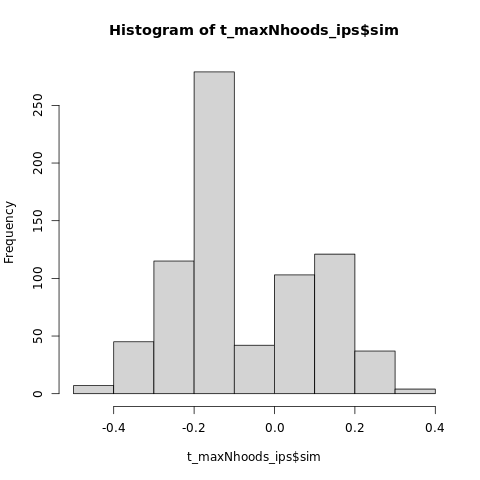

In [16]:
%%R

hist(t_maxNhoods_ips$sim) # outlier nhood is in Tuft cells

p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods_ips)
p1 <- p1 + scale_colour_gradientn(colours = myPalette(5), name="Max correlation difference", limits = c(-0.48,0.45)) + # limits = c(-1.8,4)
            labs(title = 'Max correlation difference\nPSC vs ASC')

ggdat_index_cell_labels = cbind(p1$data, 
                                celltype = as.character(colData(t_milo)$Cell_type[t_maxNhoods_ips$nhoods1]))
head(ggdat_index_cell_labels)

In [17]:
%%R
summary(ggdat_index_cell_labels$max_correlation)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.46193 -0.19307 -0.13720 -0.07664  0.08384  0.34449 


In [18]:
%%R
# ggdat <- ggdat_index_cell_labels[ggdat_index_cell_labels$max_correlation > .25 | ggdat_index_cell_labels$max_correlation < 0.05,]
ggdat <- ggdat_index_cell_labels

In [19]:
%%R
table(unique(ggdat$celltype))


          Enterocyte Enterocyte_precursor      Enteroendocrine 
                   1                    1                    1 
              Goblet               M_cell            Stem_cell 
                   1                    1                    1 
                Tuft 
                   1 


In [20]:
%%R
# nhood_max_per_celltype = lapply(unique(ggdat$celltype),
#                        FUN=function(x){
#                            z = ggdat[ggdat$celltype %in% x, ]
#                            z = z[z$max_correlation > 0.25,]
#                            z[which.max(z$max_correlation),]
#                        })



# nhood_max_per_celltype_lowcorr = lapply(unique(ggdat$celltype),
#                        FUN=function(x){
#                            z = ggdat[(ggdat$celltype %in% x), ]
#                            z = z[z$max_correlation < 0.05,]
#                            z[which.min(z$max_correlation),]
#                        })



# subset celltypes based on ridge plots
keep_celltypes <- c('Stem_cell','Enterocyte_precursor','Enteroendocrine','Enterocyte')

nhood_max_per_celltype = lapply(keep_celltypes,
                       FUN=function(x){
                           z = ggdat[ggdat$celltype %in% x, ]
                           z[which.max(z$max_correlation),]
                       })



In [21]:
%%R
nhood_max_per_celltype = do.call(rbind, nhood_max_per_celltype)
# nhood_max_per_celltype_lowcorr = do.call(rbind, nhood_max_per_celltype_lowcorr)
# nhood_max_per_celltype <- rbind(nhood_max_per_celltype, nhood_max_per_celltype_lowcorr)

In [22]:
%%R
table(duplicated(nhood_max_per_celltype))


FALSE 
    4 


In [23]:
%%R
# clean-up annotations labels

nhood_max_per_celltype$celltype <- gsub("_", " " ,nhood_max_per_celltype$celltype )



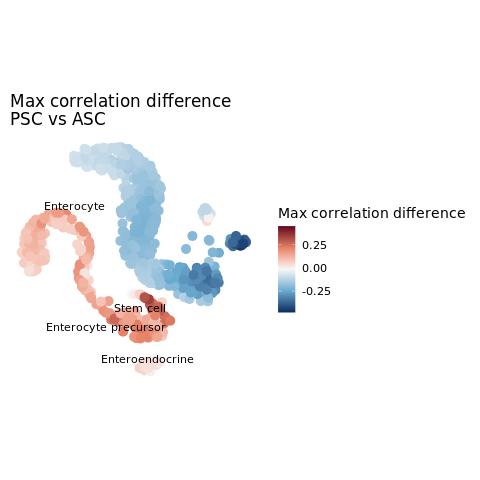

In [24]:
%%R
p1 +  geom_point(data = p1$data, aes(x= x, y= y, color = max_correlation), size =4) +
 geom_text_repel(data = nhood_max_per_celltype, 
                     aes(x= x, y= y, label = celltype))

In [25]:
%%R
p1 <- p1 +
 geom_point(data = p1$data, aes(x= x, y= y, color = max_correlation), size =4) 
# geom_text_repel(data = nhood_max_per_celltype, size = 5,
#                      aes(x= x, y= y, label = celltype),  xlim = c(-Inf, Inf),  box.padding = 0.6)
ggsave("compare_nhoods/intestine_analysis/contrast_tissue_nhood_max_corr_psc_vs_asc.pdf", p1, width=8, height=5, dpi=300)

#### tPSC vs ACS

In [26]:
%%R

t_maxNhoods_tips <- getMaxMappings(out_tips$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_asc <- getMaxMappings(out_asc$nhood_sim, 1, long_format=FALSE) 

t_maxNhoods_tips$sim = t_maxNhoods_tips$sim-t_maxNhoods_asc$sim


p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods_tips)
p1 <- p1 + scale_colour_gradientn(colours = myPalette(5), name="Max correlation difference", limits = c(-0.45,0.45)) + #  limits = c(-0.45,0.45)
            labs(title = 'Max correlation difference\ntPSC vs ASC')

    
p1 <- p1 +
 geom_point(data = p1$data, aes(x= x, y= y, color = max_correlation), size =4) 
# p1 <- p1 + scale_color_gradient2(midpoint = 1, name="Max correlation ratio\nPSC vs FSC" )
# viridis::scale_color_viridis(option="cividis",name="Max correlation ratio\nPSC vs FSC")
ggsave("compare_nhoods/intestine_analysis/contrast_tissue_nhood_max_corr_tpsc_vs_Asc.pdf", p1, width=8, height=5, dpi=300)


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


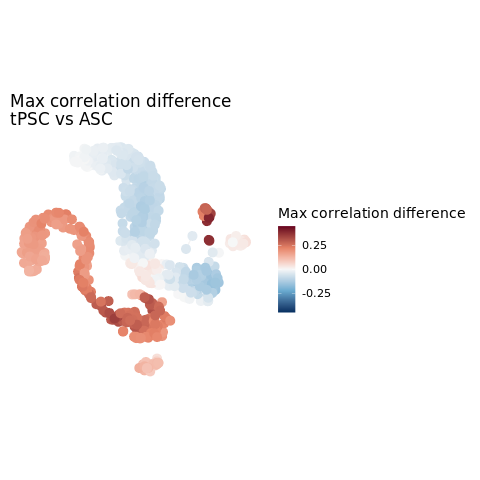

In [27]:
%%R
p1

####  FSC vs ASC

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


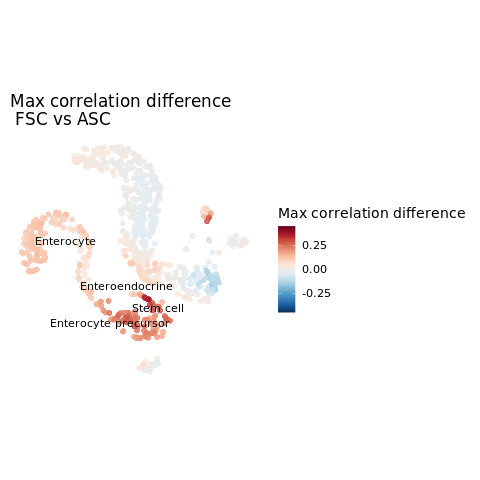

In [28]:
%%R

t_maxNhoods_fsc <- getMaxMappings(out_fsc$nhood_sim, 1, long_format=FALSE) 
t_maxNhoods_asc <- getMaxMappings(out_asc$nhood_sim, 1, long_format=FALSE) 

t_maxNhoods_fsc$sim = t_maxNhoods_fsc$sim - t_maxNhoods_asc$sim


p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods_fsc)
p1 <- p1 + scale_colour_gradientn(colours = myPalette(10), name="Max correlation difference", limits = c(-0.45,0.45)) + # limits = c(-0.45,0.45)
            labs(title = 'Max correlation difference\n FSC vs ASC') # old plots


ggdat_index_cell_labels = cbind(p1$data, 
                                celltype = as.character(colData(t_milo)$Cell_type[t_maxNhoods_fsc$nhoods1]))


ggdat <- ggdat_index_cell_labels


nhood_max_per_celltype = lapply(keep_celltypes,
                       FUN=function(x){
                           z = ggdat[ggdat$celltype %in% x, ]
                           z[which.max(z$max_correlation),]
                       })


nhood_max_per_celltype = do.call(rbind, nhood_max_per_celltype)


nhood_max_per_celltype$celltype <- gsub("_", " " ,nhood_max_per_celltype$celltype )

p1 + geom_text_repel(data = nhood_max_per_celltype, 
                     aes(x= x, y= y, label = celltype))

In [29]:
%%R
p1 <- p1 + geom_point(data = p1$data, aes(x= x, y= y, color = max_correlation), size =4) 
# geom_text_repel(data = nhood_max_per_celltype, 
#                 aes(x= x, y= y, label = celltype), size = 5, xlim = c(-Inf, Inf),  box.padding = 0.95)
ggsave("compare_nhoods/intestine_analysis/contrast_tissue_nhood_max_corr_fsc_vs_asc.pdf", p1, width=8, height=5, dpi=300)

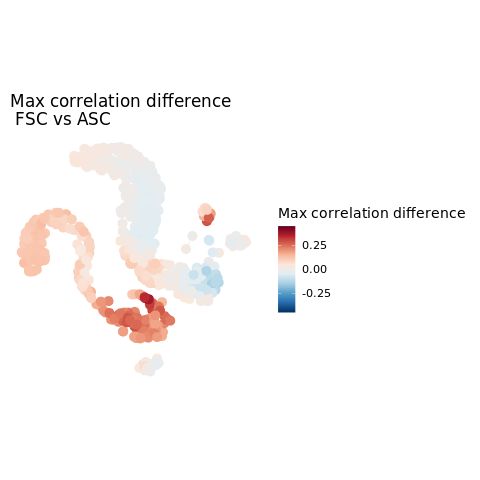

In [30]:
%%R
p1